Epoch[20/1000], loss: 0.179557
Epoch[40/1000], loss: 0.178517
Epoch[60/1000], loss: 0.177579
Epoch[80/1000], loss: 0.176732
Epoch[100/1000], loss: 0.175968
Epoch[120/1000], loss: 0.175278
Epoch[140/1000], loss: 0.174656
Epoch[160/1000], loss: 0.174095
Epoch[180/1000], loss: 0.173589
Epoch[200/1000], loss: 0.173132
Epoch[220/1000], loss: 0.172720
Epoch[240/1000], loss: 0.172348
Epoch[260/1000], loss: 0.172012
Epoch[280/1000], loss: 0.171710
Epoch[300/1000], loss: 0.171437
Epoch[320/1000], loss: 0.171190
Epoch[340/1000], loss: 0.170968
Epoch[360/1000], loss: 0.170767
Epoch[380/1000], loss: 0.170586
Epoch[400/1000], loss: 0.170423
Epoch[420/1000], loss: 0.170275
Epoch[440/1000], loss: 0.170143
Epoch[460/1000], loss: 0.170023
Epoch[480/1000], loss: 0.169914
Epoch[500/1000], loss: 0.169817
Epoch[520/1000], loss: 0.169729
Epoch[540/1000], loss: 0.169649
Epoch[560/1000], loss: 0.169577
Epoch[580/1000], loss: 0.169513
Epoch[600/1000], loss: 0.169454
Epoch[620/1000], loss: 0.169402
Epoch[640/10

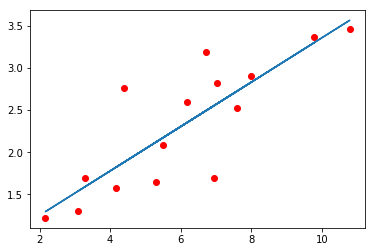

In [1]:
"""一维线性回归代码实现"""
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1)
 
 
    def forward(self, x):
        out = self.linear(x)
        return out
 
 
 
if __name__ == '__main__':
    x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
 
    y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
 
    x_train = torch.from_numpy(x_train)
    y_train = torch.from_numpy(y_train)
 
    if torch.cuda.is_available():
        model = LinearRegression().cuda()
    else:
        model = LinearRegression()
 
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=1e-2)
 
 
    num_epochs = 1000
    for epoch in range(num_epochs):
        if torch.cuda.is_available():
            inputs = Variable(x_train).cuda()
            target = Variable(y_train).cuda()
        else:
            inputs = Variable(x_train)
            target = Variable(y_train)
 
        # forward
        out = model.forward(inputs)
        loss = criterion(out, target)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
        if(epoch+1)%20==0:
            print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.item()))
 
    model.eval()
    model.cpu()
    predict = model(Variable(x_train))
    predict = predict.data.numpy()
    plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
    plt.plot(x_train.numpy(), predict, label='Fitting Line')
    plt.show()